In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Data Sets/LoanExport.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(291451, 28)

In [4]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

*The seller name is not very important for model building and would most likely be droped, so no need to deal with null values*

In [6]:
df.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [8]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [9]:
df.duplicated().sum()

0

*No Duplicates*

In [10]:
df['FirstPaymentDate'].unique()

array([199902, 199903, 199904, 199905, 199906, 199907, 199908, 199909,
       199910, 199911, 199912, 200001, 200004, 200005, 200006, 200105,
       200009, 200204, 200303, 200212, 200007, 200003, 200206, 200002,
       200008, 200106, 200011, 200103, 200202, 200101, 200304, 200010,
       200112, 200102, 200308, 200107, 200210, 200104, 200110, 200108,
       200309, 200305, 200201, 200109, 200111, 200312, 200405, 200209,
       199901, 200301, 200208, 200012, 200203, 200306, 200307, 200302,
       200205, 200207, 200211, 200401, 201111, 201303, 200310, 200311,
       200403, 200404])

In [11]:
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')

In [12]:
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')

In [13]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


*Dates changed to respective formats*

*We might not use these columns though*

In [14]:
def plot_cat(col):
  sns.barplot(data=df,x=df[col].value_counts().values,y=df[col].value_counts().index)
  plt.title(str.title(col))
  plt.xlabel("Count")
  plt.xticks(rotation=45)
  plt.show()

In [15]:
def plot_out(col):
  fig,ax=plt.subplots(1,2,figsize=(15,5))
  sns.boxplot(df[col],ax=ax[0],showfliers=False)
  sns.distplot(df[col],ax=ax[1],kde=False,bins=40)
  plt.title(f'{col} distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

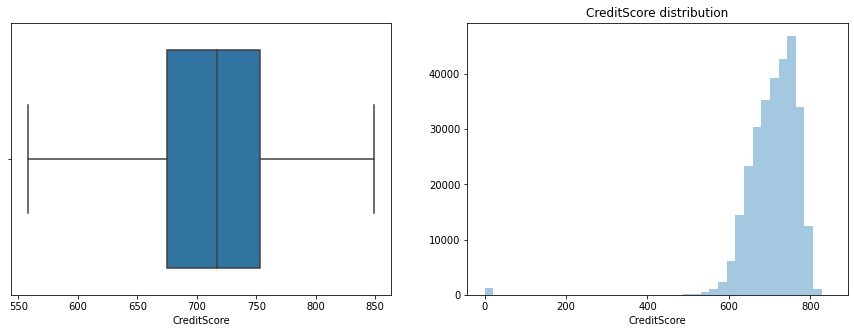

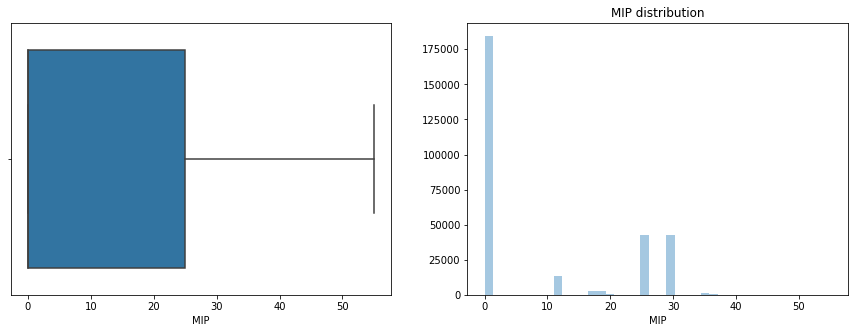

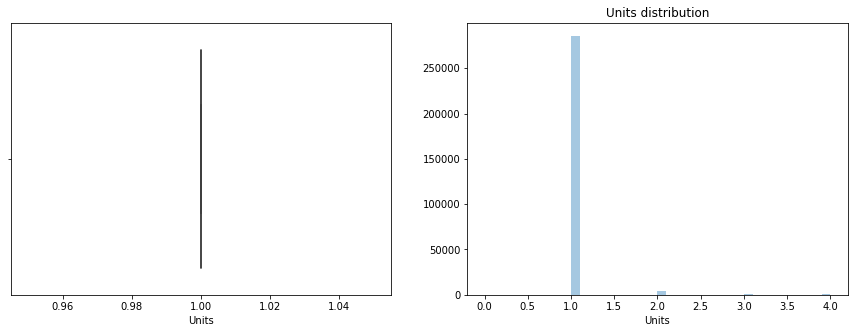

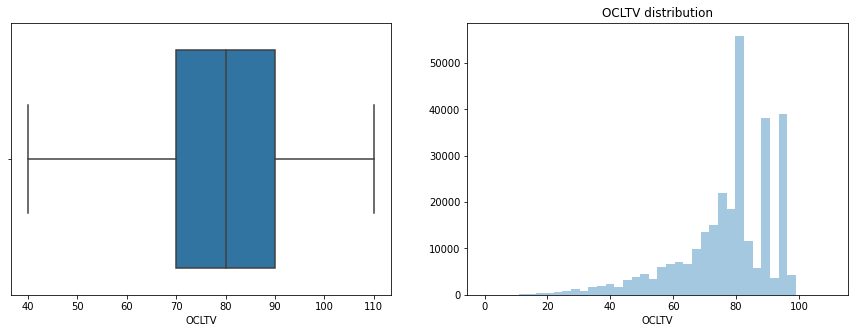

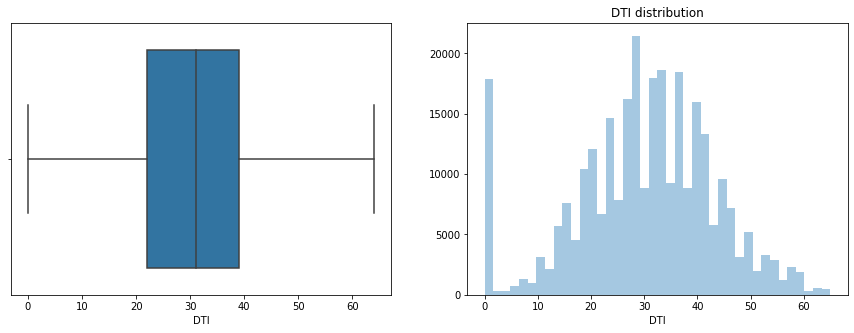

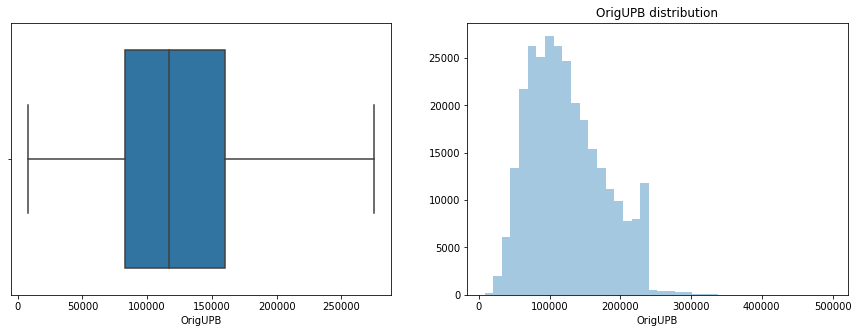

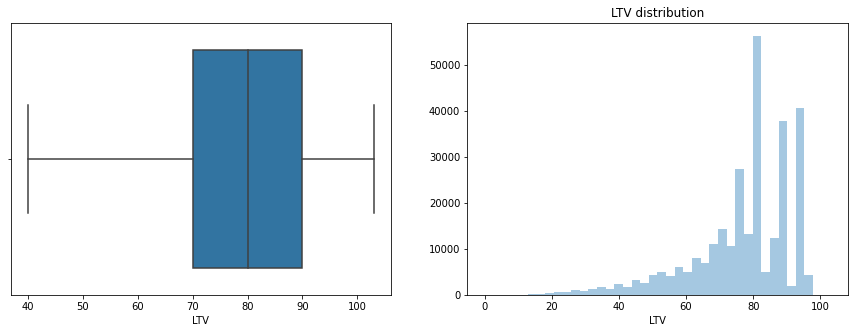

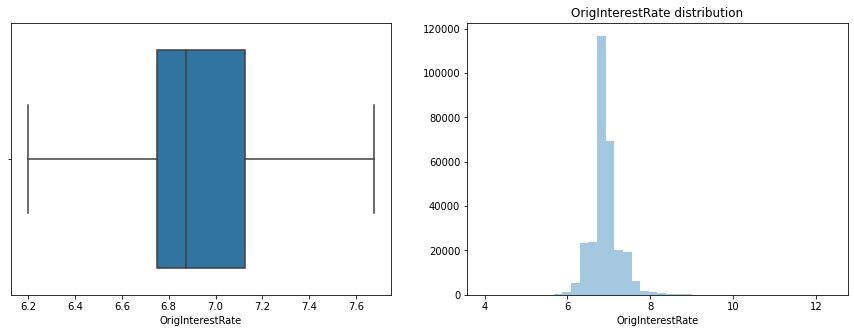

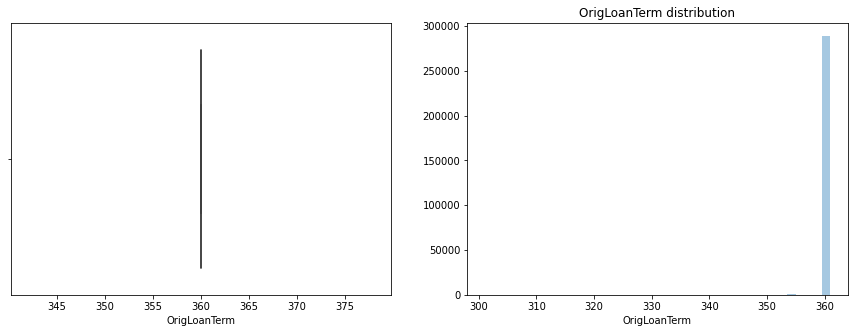

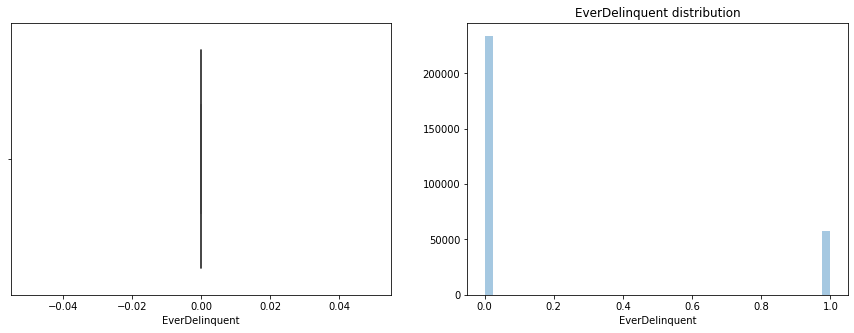

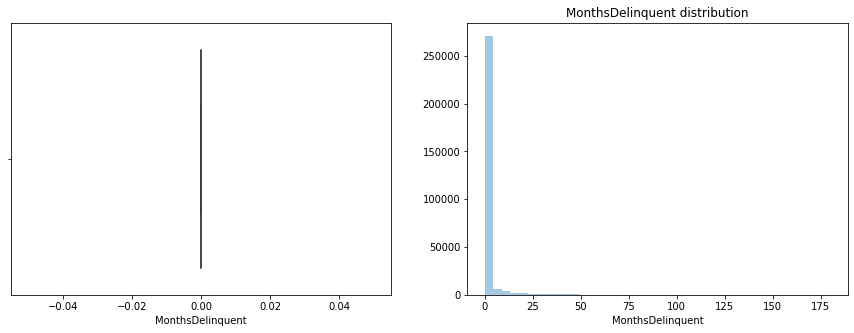

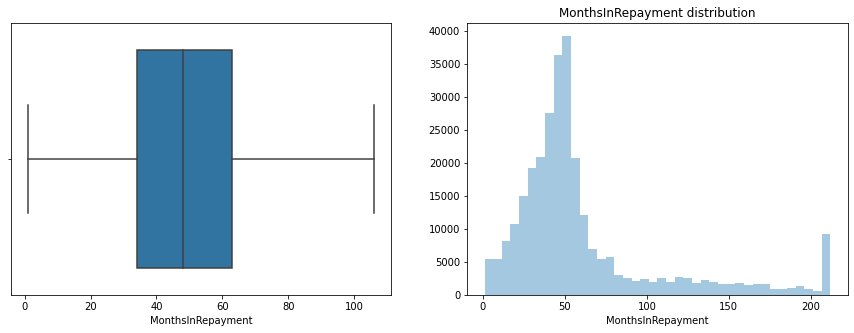

In [16]:
for i in ["CreditScore","MIP","Units","OCLTV","DTI","OrigUPB","LTV","OrigInterestRate","OrigLoanTerm","EverDelinquent","MonthsDelinquent","MonthsInRepayment"]:
  plot_out(i)

In [17]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

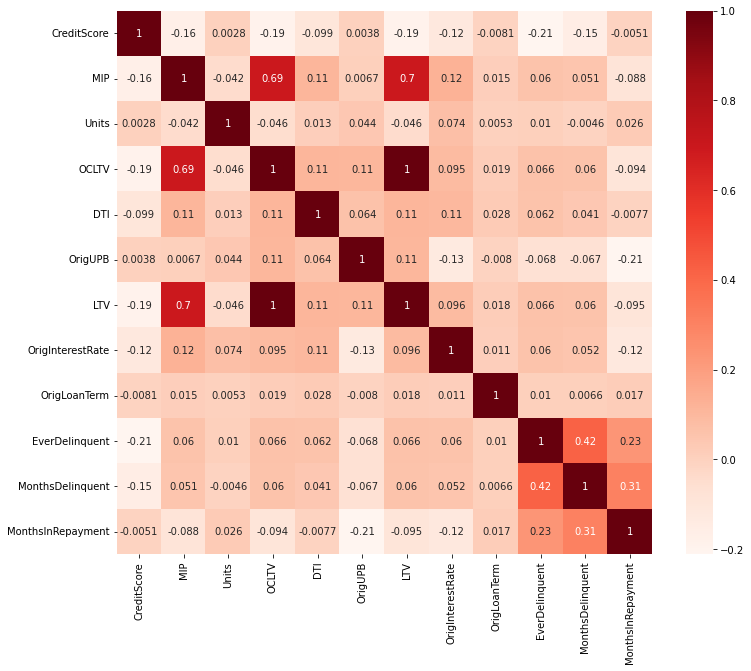

In [18]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
a=df['FirstTimeHomebuyer'].value_counts()

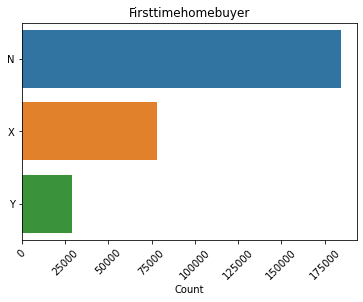

In [20]:
plot_cat("FirstTimeHomebuyer")

*First time home buyer*

In [21]:
df['MSA'].value_counts()

X        39100
31084     9338
16974     8771
12060     6985
47644     6673
         ...  
21940        3
49500        2
25020        1
10380        1
32420        1
Name: MSA, Length: 392, dtype: int64

In [22]:
df["MSA"].replace("X    ","X",inplace=True)

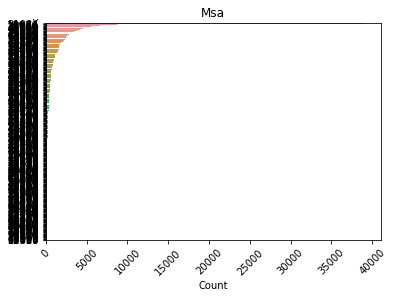

In [23]:
plot_cat("MSA")

*Ideally we would like to change its dtype to numeric but hold of for now as "X" is present in it* 

*Marketing Services Agreements*

In [24]:
df['MIP'].value_counts()

0     184511
25     42441
30     41869
12     13294
18      3005
17      2739
35      1290
36       748
29       640
20       497
14       166
27        66
22        45
6         32
33        24
32         9
28         9
15         7
50         7
47         7
26         7
24         6
16         5
1          5
13         4
52         3
10         3
37         3
55         1
21         1
23         1
19         1
45         1
7          1
9          1
11         1
4          1
Name: MIP, dtype: int64

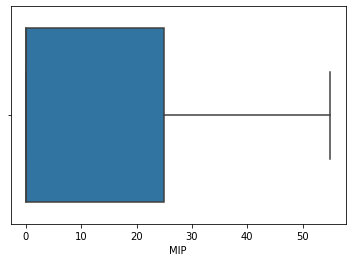

In [25]:
sns.boxplot(x='MIP',data=df)

*Mortgage insurance premium*

In [26]:
df['Units'].value_counts()

1    285598
2      4690
3       587
4       574
0         2
Name: Units, dtype: int64

In [27]:
df["Units"].replace(0,1,inplace=True)

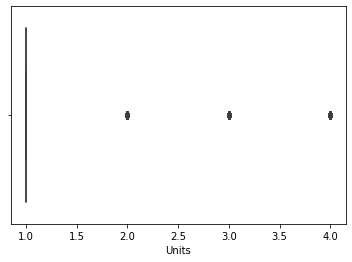

In [28]:
sns.boxplot(x='Units',data=df)

*Units*

In [29]:
df['Occupancy'].value_counts()

O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64

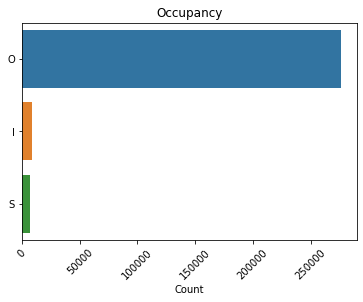

In [30]:
plot_cat("Occupancy")

*Occupancy*

In [31]:
df['OrigInterestRate'].value_counts()

6.875     69884
6.750     46762
7.000     44927
7.125     23664
6.625     23568
          ...  
6.883         1
6.100         1
8.070         1
11.125        1
5.800         1
Name: OrigInterestRate, Length: 254, dtype: int64

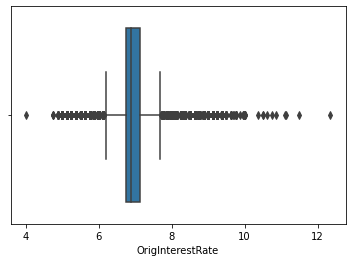

In [32]:
sns.boxplot(x='OrigInterestRate',data=df)

*Original Interest Rate*

In [33]:
df["OCLTV"].value_counts()

80     54126
95     37243
90     29646
75     17907
79      7317
       ...  
98         8
101        5
0          5
104        4
110        3
Name: OCLTV, Length: 102, dtype: int64

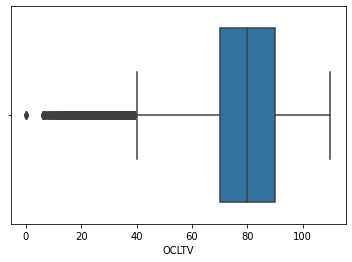

In [34]:
sns.boxplot(x='OCLTV',data=df)

*100-110 is an anomaly*

In [35]:
ocltv_anom=df[df["OCLTV"]>100]

*Original Combined loan to value*

In [36]:
df['DTI'].value_counts()

0     17796
28    12818
36     9493
33     9378
35     9297
      ...  
63      272
65      207
3       180
2       109
1        64
Name: DTI, Length: 66, dtype: int64

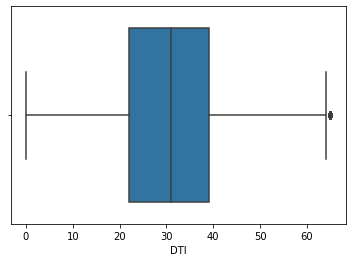

In [37]:
sns.boxplot(x='DTI',data=df)

*Debt to Income Ratio*

In [38]:
df["OrigUPB"].value_counts()

240000    7035
100000    5474
80000     3707
90000     3555
120000    3549
          ... 
9000         1
353000       1
497000       1
442000       1
420000       1
Name: OrigUPB, Length: 375, dtype: int64

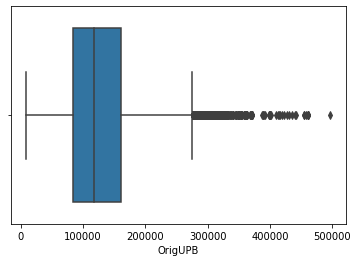

In [39]:
sns.boxplot(x='OrigUPB',data=df)

*Original Unpaid Balence*

In [40]:
df["LTV"].value_counts()

80     54503
95     37209
90     29343
75     17918
79      7329
       ...  
6          9
98         6
0          5
103        1
99         1
Name: LTV, Length: 97, dtype: int64

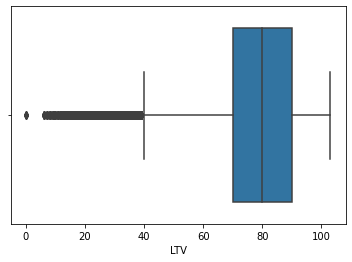

In [41]:
sns.boxplot(x='LTV',data=df)

*It can be above 100 but is an anomaly*

In [42]:
ltv_anom=df[df["LTV"]>100]

*Loan to Value*

In [43]:
df["OrigInterestRate"].value_counts()

6.875     69884
6.750     46762
7.000     44927
7.125     23664
6.625     23568
          ...  
6.883         1
6.100         1
8.070         1
11.125        1
5.800         1
Name: OrigInterestRate, Length: 254, dtype: int64

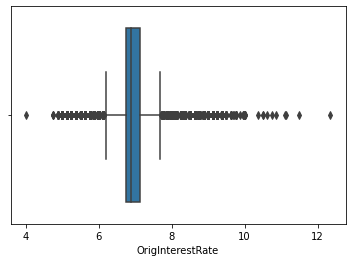

In [44]:
sns.boxplot(x='OrigInterestRate',data=df)

*Original Interest Rate*

In [45]:
df["Channel"].value_counts()

T    167670
R    123219
C       407
B       155
Name: Channel, dtype: int64

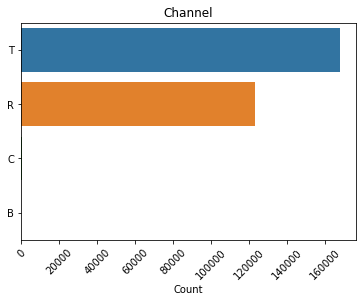

In [46]:
plot_cat("Channel")

*Channels*

In [47]:
df["PPM"].value_counts()

N    282125
X      5405
Y      3921
Name: PPM, dtype: int64

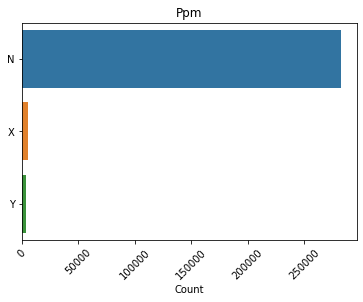

In [48]:
plot_cat("PPM")

*Prepayment Penalty Mortgage*

In [49]:
df["ProductType"].value_counts()

FRM      291451
Name: ProductType, dtype: int64

*Only one type, dont need it*

*Product Type*

In [50]:
df["PropertyState"].value_counts()

CA    43327
FL    19133
MI    16285
IL    13621
TX    13092
OH    11545
CO    10127
GA    10024
NC     9983
WA     9927
AZ     9248
VA     8096
NY     7913
PA     7738
NJ     7457
OR     6658
MA     6392
IN     6228
MD     5515
MO     5400
MN     5092
UT     4996
WI     4660
TN     4556
SC     4473
AL     4128
KY     3896
NV     3564
CT     3253
KS     2321
ID     2296
LA     2092
NM     2053
IA     1860
OK     1803
NE     1532
NH     1320
VT      945
AR      938
MS      935
MT      872
DE      838
ME      755
RI      722
PR      693
HI      609
WV      542
WY      496
DC      492
SD      376
ND      315
AK      245
GU       74
Name: PropertyState, dtype: int64

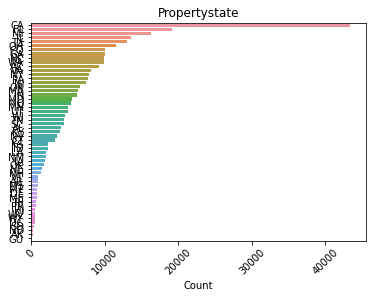

In [51]:
plot_cat("PropertyState")

*Property State*

In [52]:
df["PropertyType"].value_counts()

SF    244923
PU     27506
CO     18100
MH       723
LH       105
CP        72
X         22
Name: PropertyType, dtype: int64

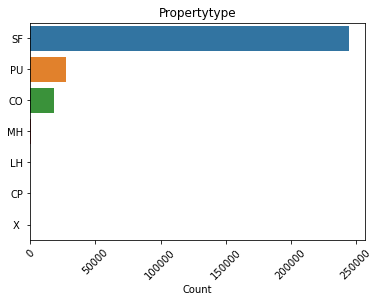

In [53]:
plot_cat("PropertyType")

*Property Type*

In [54]:
df["PostalCode"].value_counts()

94500    2582
30000    2374
48100    2166
85200    2155
48000    1976
         ... 
79500       1
26600       1
41400       1
36900       1
41300       1
Name: PostalCode, Length: 1767, dtype: int64

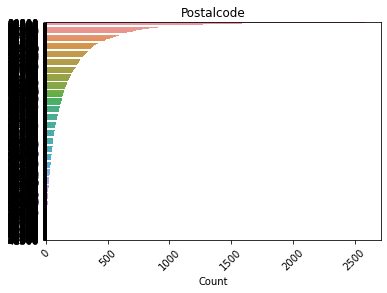

In [55]:
plot_cat("PostalCode")

*Postal Code*

In [56]:
df["LoanSeqNum"].value_counts()

F199Q1268030    1
F199Q1262485    1
F199Q1138623    1
F199Q1220622    1
F199Q1155120    1
               ..
F199Q1021744    1
F199Q1098563    1
F199Q1049090    1
F199Q1170229    1
F199Q1220923    1
Name: LoanSeqNum, Length: 291451, dtype: int64

*Dont need to visualize it*

*Loan Seqence Number*

In [57]:
df["LoanPurpose"].value_counts()

P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

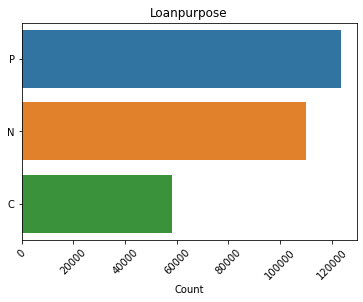

In [58]:
plot_cat("LoanPurpose")

*Loan Purpose*

In [59]:
df["OrigLoanTerm"].value_counts()

360    289073
354       434
336       205
359       103
348        94
        ...  
301         6
302         5
304         4
303         4
361         2
Name: OrigLoanTerm, Length: 61, dtype: int64

In [60]:
df["OrigLoanTerm"].describe()

count    291451.000000
mean        359.835375
std           2.286939
min         301.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         361.000000
Name: OrigLoanTerm, dtype: float64

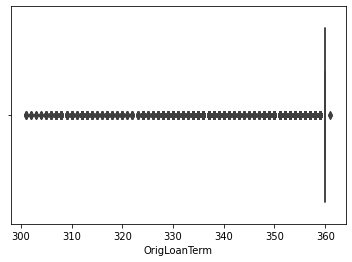

In [61]:
sns.boxplot(x='OrigLoanTerm',data=df)

*Original Loan Term*

In [62]:
df["NumBorrowers"].value_counts()

2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64

*Need to do more*

*Number Of Borrowers*

In [63]:
df["SellerName"].value_counts()

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

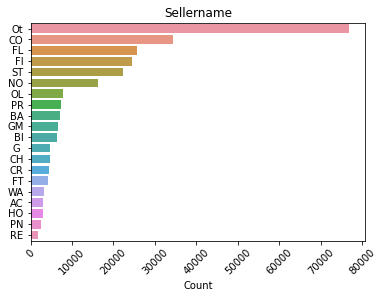

In [64]:
plot_cat("SellerName")

*Seller Name*

In [65]:
df["ServicerName"].value_counts()

Other servicers         64043
COUNTRYWIDE             31142
BANKOFAMERICANA         29481
WASHINGTONMUTUALBANK    22626
CHASEMANHATTANMTGECO    14791
ABNAMROMTGEGROUPINC     14369
WELLSFARGOHOMEMORTGA    13960
GMACMTGECORP            11560
BAMORTGAGELLC           11559
CHASEMTGECO             10109
NATLCITYMTGECO           9940
WELLSFARGOBANKNA         9460
JPMORGANCHASEBANKNA      7723
FTMTGESERVICESINC        7126
SUNTRUSTMORTGAGEINC      6680
CITIMORTGAGEINC          6529
PRINCIPALRESIDENTIAL     6335
CHASEHOMEFINANCELLC      5399
HOMESIDELENDINGINC       4508
FIFTHTHIRDBANK           4111
Name: ServicerName, dtype: int64

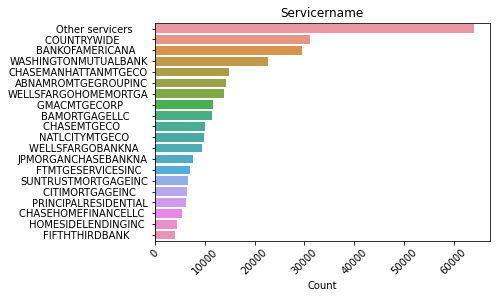

In [66]:
plot_cat("ServicerName")

*Servicer Name*

In [67]:
df["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

*If you failed to make a payment or not*

*Ever Delinquent*

In [68]:
df["MonthsDelinquent"].value_counts()

0      233788
1       23161
2        7572
3        3823
4        2459
        ...  
153         1
178         1
159         1
163         1
171         1
Name: MonthsDelinquent, Length: 174, dtype: int64

*How many months did you fail to make payment*

*Months Delinquent*

In [69]:
df["MonthsInRepayment"].value_counts()

50     8002
49     7976
52     7947
51     7753
53     7603
       ... 
207     112
200     111
205     107
203     100
204      99
Name: MonthsInRepayment, Length: 212, dtype: int64

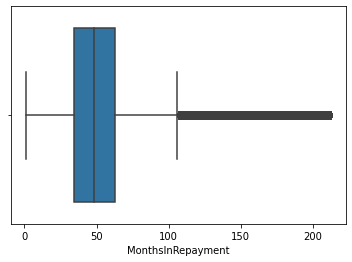

In [70]:
sns.boxplot(x='MonthsInRepayment',data=df)

*Months in Repayment*

In [71]:
corr_anom = df["OCLTV"].corr(df["LTV"])
corr_anom

0.9994702817952186

In [72]:
merge_anom = ltv_anom.merge(ocltv_anom, how = 'inner' ,indicator=False)
merge_anom

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,625,1999-05-01,Y,2029-04-01,31084,0,1,O,103,49,...,91300,F199Q1025270,P,360,2,CO,COUNTRYWIDE,1,1,65


*They are highly correlated and the anomaly present in ltv is also present in ocltv*

*We should take this into account if we are dropping columns*

In [73]:
def find_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [74]:
outlier1 = find_outliers(df['MonthsInRepayment'])
outlier1=pd.DataFrame(outlier1)
outlier1.shape

(40297, 1)

In [75]:
outlier2 = find_outliers(df['MonthsDelinquent'])
outlier2=pd.DataFrame(outlier2)
outlier2.shape

(57663, 1)

In [76]:
idx = np.intersect1d(outlier1.index, outlier2.index)
len(idx)

14908

In [77]:
numeric=["CreditScore","MIP","Units","DTI","OrigUPB","LTV","OrigInterestRate","OrigLoanTerm","EverDelinquent","MonthsDelinquent","MonthsInRepayment"]
for i in numeric:
  o1=find_outliers(df[i])
  o1=pd.DataFrame(o1)
  print(o1.shape)
  for j in numeric:
    o2=find_outliers(df[j])
    o2=pd.DataFrame(o2)
    idx = np.intersect1d(o1.index, o2.index)
    print(len(idx),end=" ")
  print()



(2296, 1)
2296 0 77 2 15 46 159 46 917 917 378 
(0, 1)
0 0 0 0 0 0 0 0 0 0 0 
(5851, 1)
77 0 5851 3 277 221 615 20 1365 1365 1145 
(207, 1)
2 0 3 207 1 10 7 2 46 46 27 
(966, 1)
15 0 277 1 966 10 40 36 129 129 65 
(8878, 1)
46 0 221 10 10 8878 274 82 1213 1213 1937 
(10755, 1)
159 0 615 7 40 274 10755 417 2732 2732 1592 
(2378, 1)
46 0 20 2 36 82 417 2378 334 334 213 
(57663, 1)
917 0 1365 46 129 1213 2732 334 57663 57663 14908 
(57663, 1)
917 0 1365 46 129 1213 2732 334 57663 57663 14908 
(40297, 1)
378 0 1145 27 65 1937 1592 213 14908 14908 40297 


*All the outliers and their co-existance*

In [78]:
df["CreditScore"].describe()

count    291451.000000
mean        708.936991
std          68.408791
min           0.000000
25%         675.000000
50%         717.000000
75%         753.000000
max         849.000000
Name: CreditScore, dtype: float64

In [79]:
df["CreditScore"].replace(0,850,inplace=True)

In [80]:
df["CreditScore"]

0         850
1         850
2         850
3         850
4         850
         ... 
291446    839
291447    840
291448    840
291449    845
291450    849
Name: CreditScore, Length: 291451, dtype: int64

In [81]:
df["CreditRange"] = pd.cut(
    x=df["CreditScore"],
    bins=[-1, 650, 700, 750, 900],
    labels=[1, 2, 3, 4],
)

In [82]:
df["CreditRange"]

0         4
1         4
2         4
3         4
4         4
         ..
291446    4
291447    4
291448    4
291449    4
291450    4
Name: CreditRange, Length: 291451, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

*Creating credit range*

In [83]:
df["LTV"].replace(103,100,inplace=True)

In [84]:
df["LTV"].describe()

count    291451.000000
mean         76.937976
std          15.225282
min           0.000000
25%          70.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: LTV, dtype: float64

In [85]:
df["LTV_Range"] = pd.cut(
    x=df["LTV"],
    bins=[-1, 25, 50, np.inf],
    labels=[1, 2, 3],
)

In [86]:
df["LTV"]

0         89
1         73
2         75
3         76
4         78
          ..
291446    60
291447    73
291448    73
291449    80
291450    47
Name: LTV, Length: 291451, dtype: int64

In [87]:
df["LTV_Range"]

0         3
1         3
2         3
3         3
4         3
         ..
291446    3
291447    3
291448    3
291449    3
291450    2
Name: LTV_Range, Length: 291451, dtype: category
Categories (3, int64): [1 < 2 < 3]

*Creating LTV Range*

In [88]:
df["FirstTimeHomebuyer"].replace("X",np.nan,inplace=True)

In [89]:
df.shape

(291451, 30)

In [90]:
df["FirstTimeHomebuyer"].isnull().sum()

78015

In [91]:
df.dropna(subset = ['FirstTimeHomebuyer'],inplace=True)

In [92]:
df.shape

(213436, 30)

In [93]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditRange,LTV_Range
0,850,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,4,3
1,850,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,4,3
2,850,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,4,3
3,850,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,N,360,2,GM,GMACMTGECORP,0,0,35,4,3
4,850,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,N,360,2,GM,GMACMTGECORP,0,0,54,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,...,N,360,2,Ot,Other servicers,0,0,12,4,3
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,...,P,319,2,Ot,Other servicers,0,0,53,4,3
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,...,N,313,1,Ot,Other servicers,0,0,38,4,3
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,...,P,360,2,Ot,Other servicers,0,0,32,4,3


In [94]:
df.reset_index(inplace = True)

In [95]:
df.drop(['index'],axis=1,inplace=True)

In [96]:
df["FirstTimeHomebuyer"].replace("N",0,inplace=True)
df["FirstTimeHomebuyer"].replace("Y",1,inplace=True)

In [97]:
df = df.astype({"FirstTimeHomebuyer": int})

*Drop x in firsttimehomebuyer and replace n and y with 0 and 1*

In [98]:
df['MonthsInRepayment']

0          52
1         144
2          67
3          35
4          54
         ... 
213431     12
213432     53
213433     38
213434     32
213435     29
Name: MonthsInRepayment, Length: 213436, dtype: int64

In [99]:
df = df.astype({"MonthsInRepayment": np.float})

<ipython-input-99-0ffbacfa6657>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.astype({"MonthsInRepayment": np.float})


In [100]:
df['MonthsInRepayment'] = df['MonthsInRepayment'].div(12)

In [101]:
df['MonthsInRepayment']

0          4.333333
1         12.000000
2          5.583333
3          2.916667
4          4.500000
            ...    
213431     1.000000
213432     4.416667
213433     3.166667
213434     2.666667
213435     2.416667
Name: MonthsInRepayment, Length: 213436, dtype: float64

In [102]:
df['MonthsInRepayment'].describe()

count    213436.000000
mean          5.021983
std           3.770038
min           0.083333
25%           2.916667
50%           4.000000
75%           5.166667
max          17.666667
Name: MonthsInRepayment, dtype: float64

In [103]:
df["RepaymentRange"] = pd.cut(
    x=df["MonthsInRepayment"],
    bins=[-1, 4, 8, 12, 16, 20],
    labels=[1, 2, 3, 4, 5],
)

In [104]:
df["RepaymentRange"]

0         2
1         3
2         2
3         1
4         2
         ..
213431    1
213432    2
213433    1
213434    1
213435    1
Name: RepaymentRange, Length: 213436, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

*Created Range for Repayment Tenure*

In [105]:
df['LoanTenure'] = (df['MaturityDate'] - df['FirstPaymentDate']).dt.days

In [106]:
df = df.astype({"LoanTenure": np.float})
df['LoanTenure'] = df['LoanTenure'].div(365)

<ipython-input-106-f4cdf14c5fec>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.astype({"LoanTenure": np.float})


*Create LoanTenure column and convert it into years*

In [107]:
df.head(8)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditRange,LTV_Range,RepaymentRange,LoanTenure
0,850,1999-02-01,0,2029-01-01,16974,25,1,O,89,27,...,2,FL,WASHINGTONMUTUALBANK,0,0,4.333333,4,3,2,29.936986
1,850,1999-02-01,0,2029-01-01,19740,0,1,O,73,17,...,1,FT,CHASEHOMEFINANCELLC,0,0,12.000000,4,3,3,29.936986
2,850,1999-02-01,0,2029-01-01,29940,0,1,O,75,16,...,2,FL,WASHINGTONMUTUALBANK,0,0,5.583333,4,3,2,29.936986
3,850,1999-02-01,0,2029-01-01,31084,0,1,O,76,14,...,2,GM,GMACMTGECORP,0,0,2.916667,4,3,1,29.936986
4,850,1999-02-01,0,2029-01-01,35644,0,1,O,78,18,...,2,GM,GMACMTGECORP,0,0,4.500000,4,3,2,29.936986
5,850,1999-02-01,0,2029-01-01,X,25,1,O,89,40,...,2,Ot,Other servicers,0,0,3.500000,4,3,1,29.936986
6,850,1999-02-01,0,2029-01-01,X,25,1,O,90,21,...,1,RE,Other servicers,0,0,3.666667,4,3,1,29.936986
7,850,1999-02-01,1,2027-10-01,25540,30,1,O,95,38,...,1,Ot,Other servicers,0,0,5.333333,4,3,2,28.682192


##*Feature Engineering*

In [108]:
df['MSA'].replace('X',np.nan,inplace=True)
df['MSA'] = pd.to_numeric(df['MSA'])
df['MSA'].fillna(df['MSA'].mean(),inplace=True)

In [109]:
df['NumBorrowers'].replace("X ","2",inplace=True)
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'])

In [110]:
df.drop(['SellerName','FirstPaymentDate','MaturityDate','LoanSeqNum','PostalCode','PropertyState','PropertyType','OCLTV'], axis=1,inplace=True)

*Drop columns that we don't need in ML*

###Encoding variables

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CreditRange'] = le.fit_transform(df['CreditRange'])
df['CreditRange'].value_counts()

2    72678
3    57184
1    54764
0    28810
Name: CreditRange, dtype: int64

In [112]:
df['LTV_Range'] = le.fit_transform(df['LTV_Range'])
df['LTV_Range'].value_counts()

2    198869
1     13203
0      1364
Name: LTV_Range, dtype: int64

In [113]:
df['RepaymentRange'] = le.fit_transform(df['RepaymentRange'])
df['RepaymentRange'].value_counts()

0    108942
1     73649
2     13911
3      8755
4      8179
Name: RepaymentRange, dtype: int64

In [114]:
df = pd.get_dummies(df, columns=['Occupancy','Channel','PPM','ProductType','LoanPurpose','ServicerName'])
df

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,...,ServicerName_GMACMTGECORP,ServicerName_HOMESIDELENDINGINC,ServicerName_JPMORGANCHASEBANKNA,ServicerName_NATLCITYMTGECO,ServicerName_Other servicers,ServicerName_PRINCIPALRESIDENTIAL,ServicerName_SUNTRUSTMORTGAGEINC,ServicerName_WASHINGTONMUTUALBANK,ServicerName_WELLSFARGOBANKNA,ServicerName_WELLSFARGOHOMEMORTGA
0,850,0,16974.0,25,1,27,117000,89,6.750,360,...,0,0,0,0,0,0,0,1,0,0
1,850,0,19740.0,0,1,17,109000,73,6.500,360,...,0,0,0,0,0,0,0,0,0,0
2,850,0,29940.0,0,1,16,88000,75,6.875,360,...,0,0,0,0,0,0,0,1,0,0
3,850,0,31084.0,0,1,14,160000,76,6.875,360,...,1,0,0,0,0,0,0,0,0,0
4,850,0,35644.0,0,1,18,109000,78,7.125,360,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213431,839,0,37964.0,0,1,32,90000,60,7.000,360,...,0,0,0,0,1,0,0,0,0,0
213432,840,0,35644.0,0,1,0,267000,73,6.375,319,...,0,0,0,0,1,0,0,0,0,0
213433,840,0,42044.0,0,1,31,87000,73,5.625,313,...,0,0,0,0,1,0,0,0,0,0
213434,845,0,37964.0,0,1,54,88000,80,7.000,360,...,0,0,0,0,1,0,0,0,0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213436 entries, 0 to 213435
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CreditScore                        213436 non-null  int64  
 1   FirstTimeHomebuyer                 213436 non-null  int64  
 2   MSA                                213436 non-null  float64
 3   MIP                                213436 non-null  int64  
 4   Units                              213436 non-null  int64  
 5   DTI                                213436 non-null  int64  
 6   OrigUPB                            213436 non-null  int64  
 7   LTV                                213436 non-null  int64  
 8   OrigInterestRate                   213436 non-null  float64
 9   OrigLoanTerm                       213436 non-null  int64  
 10  NumBorrowers                       213436 non-null  int64  
 11  EverDelinquent                     2134

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


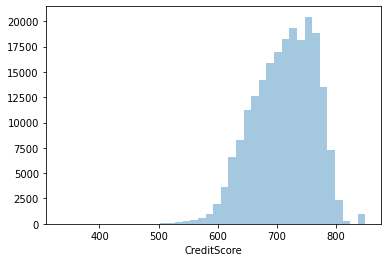

In [116]:
sns.distplot(df["CreditScore"],kde=False,bins=40)

*before scalling*

In [117]:
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()    
  
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,...,ServicerName_GMACMTGECORP,ServicerName_HOMESIDELENDINGINC,ServicerName_JPMORGANCHASEBANKNA,ServicerName_NATLCITYMTGECO,ServicerName_Other servicers,ServicerName_PRINCIPALRESIDENTIAL,ServicerName_SUNTRUSTMORTGAGEINC,ServicerName_WASHINGTONMUTUALBANK,ServicerName_WELLSFARGOBANKNA,ServicerName_WELLSFARGOHOMEMORTGA
0,2.656234,-0.398757,-1.316176,1.096843,-0.123251,-0.407317,-0.158281,0.703612,-0.538061,0.071642,...,-0.220813,-0.125912,-0.155071,-0.128593,-0.544703,-0.123079,-0.125026,3.230521,-0.165167,-0.229316
1,2.656234,-0.398757,-1.052901,-0.797762,-0.123251,-1.286054,-0.307445,-0.336233,-1.264073,0.071642,...,-0.220813,-0.125912,-0.155071,-0.128593,-0.544703,-0.123079,-0.125026,-0.309546,-0.165167,-0.229316
2,2.656234,-0.398757,-0.082037,-0.797762,-0.123251,-1.373928,-0.699002,-0.206252,-0.175055,0.071642,...,-0.220813,-0.125912,-0.155071,-0.128593,-0.544703,-0.123079,-0.125026,3.230521,-0.165167,-0.229316
3,2.656234,-0.398757,0.026851,-0.797762,-0.123251,-1.549675,0.643478,-0.141262,-0.175055,0.071642,...,4.528700,-0.125912,-0.155071,-0.128593,-0.544703,-0.123079,-0.125026,-0.309546,-0.165167,-0.229316
4,2.656234,-0.398757,0.460884,-0.797762,-0.123251,-1.198180,-0.307445,-0.011281,0.550957,0.071642,...,4.528700,-0.125912,-0.155071,-0.128593,-0.544703,-0.123079,-0.125026,-0.309546,-0.165167,-0.229316


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


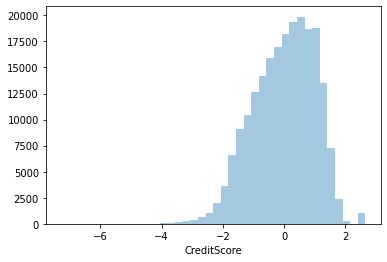

In [118]:
sns.distplot(df["CreditScore"],kde=False,bins=40)

*after scalling*